In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv('./dataset/hour.csv')
print(data.shape)
data.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data = data.rename(columns={'dteday':'date',
                            'weathersit':'weather',
                            'yr':'year',
                            'mnth':'month',
                            'hr':'hour',
                            'hum':'humidity',
                            'cnt':'count'})
data.head(7)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2


In [4]:
all(data['casual'] + data['registered'] == data['count'])

True

In [5]:
data = data.drop(columns=['date', 'instant', 'casual', 'registered'])

In [6]:
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
numerical_columns = ['hour', 'temp', 'atemp', 'humidity', 'windspeed']

In [7]:
data[categorical_columns] = data[categorical_columns].astype('category')

In [8]:
data.describe()

,hour,temp,atemp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.496987,0.475775,0.627229,0.190098,189.463088
std,6.914405,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  category
 2   month       17379 non-null  category
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(2)
memory usage: 935.1 KB


In [10]:
data.apply(lambda x: x.nunique())

season          4
year            2
month          12
hour           24
holiday         2
weekday         7
workingday      2
weather         4
temp           50
atemp          65
humidity       89
windspeed      30
count         869
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  category
 2   month       17379 non-null  category
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(2)
memory usage: 935.1 KB


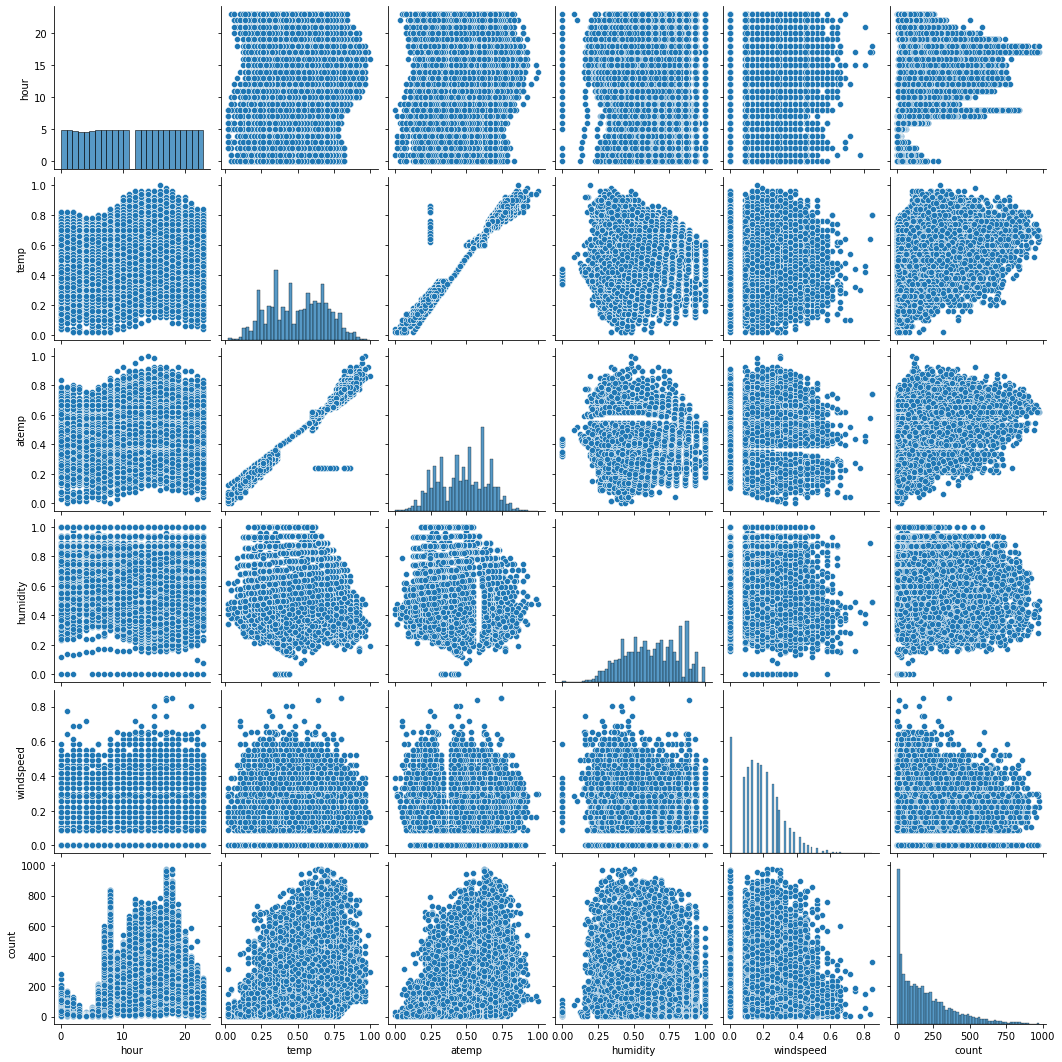

In [12]:
sns.pairplot(data)

In [13]:
ProfileReport(data).to_file('test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

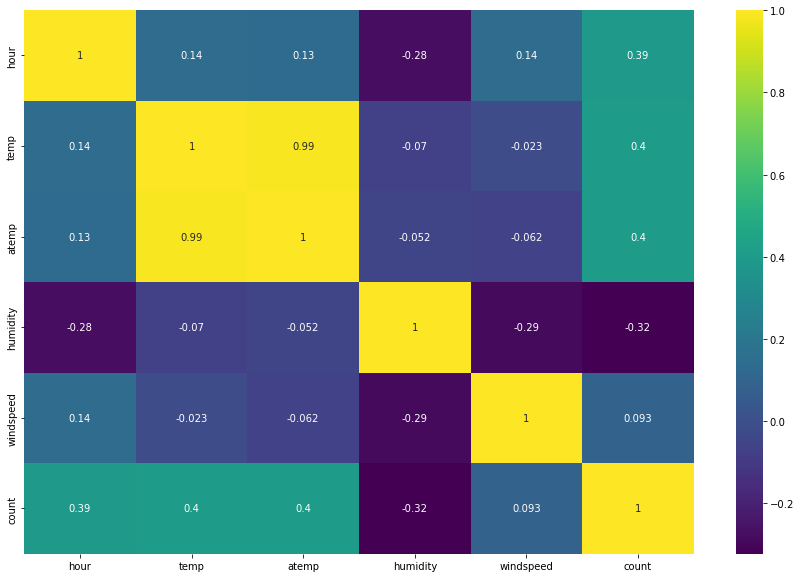

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='viridis', annot=True)

In [15]:
data.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

#### Observations
1. month is highly overall correlated with season
2. atemp is highly overall correlated with temp
3. year has only 2 values; useless

### AI
1. Drop columns: season, atemp, year

In [16]:
df = data.drop(columns=['season', 'atemp', 'year'])
df.head()

,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,4,0,6,0,1,0.24,0.75,0.0,1


## Splitting into feature and target

In [17]:
from sklearn.utils import shuffle

In [18]:
df = shuffle(df).reset_index(drop=True)

In [19]:
X = df.drop(columns=['count'])
y = df['count']
X.shape, y.shape

((17379, 9), (17379,))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 9), (5214, 9), (12165,), (5214,))

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [23]:
ss = StandardScaler()
X_train_trf = ss.fit_transform(X_train)
X_test_trf = ss.transform(X_test)

In [24]:
df.head()

,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,7,11,0,4,1,1,0.72,0.37,0.2239,148
1,12,6,0,1,1,1,0.36,0.93,0.0000,138
2,9,16,0,4,1,2,0.54,0.77,0.4627,222
3,4,11,0,5,1,1,0.46,0.36,0.1343,233
4,8,8,0,0,0,1,0.72,0.79,0.1940,89


0: sunday
1: monday
..
6: saturday


In [25]:
pd.crosstab(index=df['holiday'], columns=df['workingday'])

workingday,0,1
holiday,,
0,5014,11865
1,500,0


In [26]:
data.groupby(['weather'])['count'].agg('sum')

weather
1    2338173
2     795952
3     158331
4        223
Name: count, dtype: int64

In [27]:
data.groupby(['season', 'weekday'])['count'].agg('sum')

season  weekday
1       0           60195
        1           63771
        2           69813
        3           65277
        4           72355
        5           74264
        6           65673
2       0          129650
        1          123255
        2          125449
        3          130547
        4          135207
        5          135792
        6          138689
3       0          138431
        1          146307
        2          152715
        3          158054
        4          159561
        5          155267
        6          150794
4       0          115751
        1          122170
        2          121132
        3          119170
        4          118272
        5          122467
        6          122651
Name: count, dtype: int64

In [28]:
df.columns

Index(['month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [29]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)
X_test_trf = pd.DataFrame(X_test_trf, columns=X_test.columns)

In [30]:
ohe_columns = ['month', 'holiday', 'weekday', 'workingday']

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    # ('tnf1', OrdinalEncoder(categories=[[1,2,3,4]]),['weather']),
    ('tnf2', OneHotEncoder(sparse = False, drop ='first'), ohe_columns)
], remainder='passthrough')

In [31]:
X_train_trf1 = transformer.fit_transform(X_train_trf)
X_test_trf1 = transformer.transform(X_test_trf)

In [32]:
pd.DataFrame(X_test_trf1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.795022,0.898568,1.256747,-1.341656,1.860468
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.528866,-0.667938,1.048892,-0.091880,-0.454587
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.085507,-0.667938,0.217474,-1.602026,-1.550891
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.366922,0.898568,-1.029653,-0.091880,-1.550891
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.802651,0.898568,-0.613944,1.001674,0.520087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.528866,-0.667938,-1.341435,-1.602026,0.885794
5210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.512165,-0.667938,-1.341435,0.376786,0.520087
5211,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.085507,-0.667938,-0.510017,-0.039806,0.276827
5212,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.383623,-0.667938,0.009620,0.272638,-1.550891


In [45]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [50]:
cv= KFold(n_splits=10, shuffle=True)
cross_val_score(RandomForestRegressor(), X_train_trf1, y_train, cv=cv, scoring='r2', n_jobs= -1)

array([0.85705508, 0.84595297, 0.84867679, 0.85317399, 0.86561826,
       0.84226568, 0.8681601 , 0.84149383, 0.85316761, 0.84435927])

In [47]:
models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]

In [51]:
for m in models:
    m.fit(X_train_trf1, y_train)
    print(m, r2_score(y_test, m.predict(X_test_trf1)), np.sqrt(mean_squared_error(y_test, m.predict(X_test_trf1))))

LinearRegression() 0.3372751592775818 149.99736053546474
RandomForestRegressor() 0.8592904861381438 69.11602030334664
DecisionTreeRegressor() 0.738985295787339 94.13464284677309


In [56]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train_trf1, y_train)
print(r2_score(y_test, xgb_model.predict(X_test_trf1)))
print(np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test_trf1))))

[21:35:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
0.8732410414458278
65.60037521728235
